In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Multi-Layer Perceptron Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, alpha=0.01,
                    solver='adam', random_state=21, activation='relu')

# Train the model
mlp.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [2]:
#Regression Task using MLP
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Multi-Layer Perceptron Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Fit the model to the training data
mlp_regressor.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = mlp_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 0.27099387608468906
R-squared (R2) Score: 0.7931990084130278


Epoch 50, Training Loss: 0.2559, Validation Loss: 0.2871
Epoch 100, Training Loss: 0.2381, Validation Loss: 0.2856
Epoch 150, Training Loss: 0.2272, Validation Loss: 0.2862
Epoch 200, Training Loss: 0.2202, Validation Loss: 0.2817
Epoch 250, Training Loss: 0.2140, Validation Loss: 0.2828
Epoch 300, Training Loss: 0.2083, Validation Loss: 0.2843
Epoch 350, Training Loss: 0.2015, Validation Loss: 0.2836
Epoch 400, Training Loss: 0.1956, Validation Loss: 0.2827
Epoch 450, Training Loss: 0.1908, Validation Loss: 0.2807
Epoch 500, Training Loss: 0.1864, Validation Loss: 0.2804


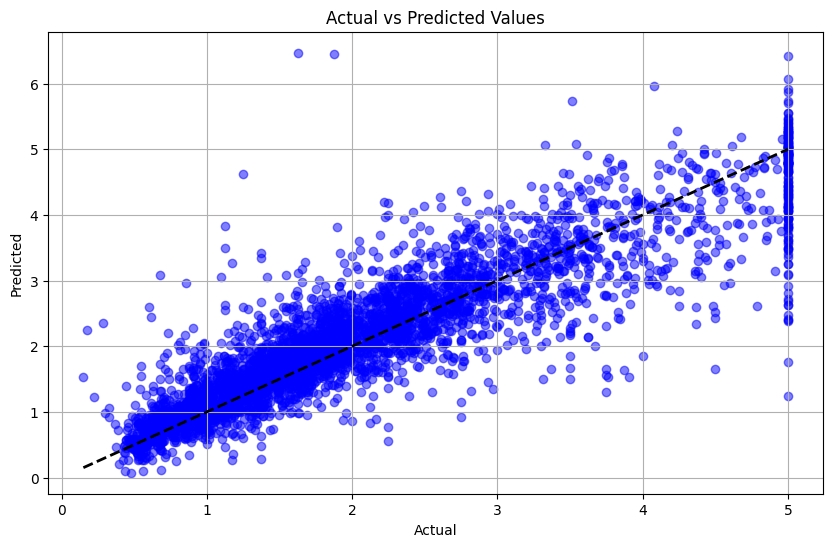

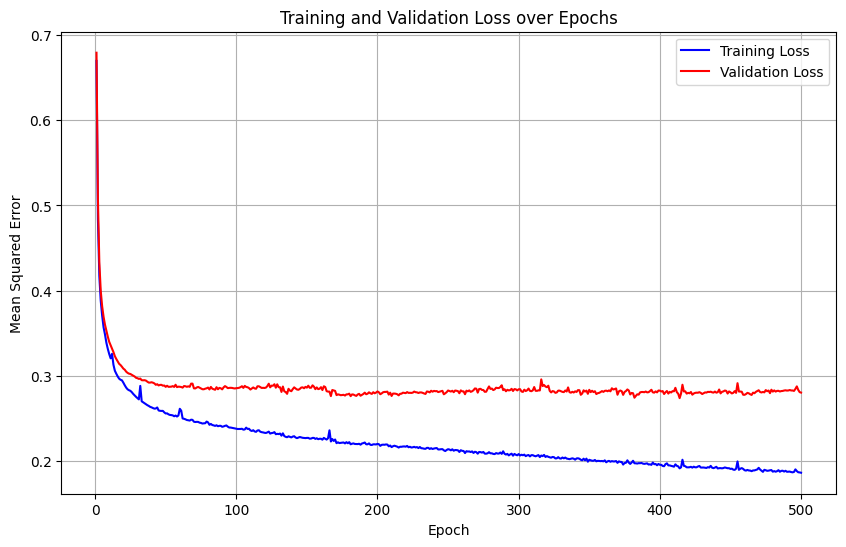

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Multi-Layer Perceptron Regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

# Lists to store training and validation loss
train_loss_history = []
val_loss_history = []

# Fit the model to the training data and monitor the training progress
for epoch in range(1, 501):
    mlp_regressor.partial_fit(X_train_scaled, y_train)
    y_train_pred = mlp_regressor.predict(X_train_scaled)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_loss_history.append(train_loss)

    y_val_pred = mlp_regressor.predict(X_test_scaled)
    val_loss = mean_squared_error(y_test, y_val_pred)
    val_loss_history.append(val_loss)

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_val_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Plotting training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 501), train_loss_history, label='Training Loss', color='blue')
plt.plot(range(1, 501), val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
